In [1]:
# Sys.setenv(NOT_CRAN = "true")
# Done install.packages("survival")
# Done install.packages("arrow")
# done install.packages("tidyverse", dependencies = TRUE, INSTALL_opts = '--no-lock')
# DOne install.packages("feather")
# Done install.packages("survminer",  dependencies = TRUE, INSTALL_opts = '--no-lock')
# DONE install.packages("mboost",  dependencies = TRUE, INSTALL_opts = '--no-lock')


In [2]:
library("survival")
library("arrow")
library("tidyverse")
library("feather")
library("survminer")
library("ggplot2")


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘feather’


The following objects are masked from ‘package:arrow’:

    read_feather, write_feather


Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




Load and display data

In [3]:
#data_path = Path("/home/project/data/students/srtr")
# transplant_cohort = "tx_cohort.parquet"
# transplant_followup = "txf_cohort.parquet"

tx_df <-read_parquet("/home/project/data/students/srtr/tx_cohort.parquet")
head(tx_df)


txf_df = read_parquet("/home/project/data/students/srtr/txf_cohort.parquet", engine="fastparquet")
head(txf_df)

CAN_ABO,CAN_ANGINA,REC_DGN,CAN_DIAB_TY,CAN_GENDER,CAN_HGT_CM,CAN_MALIG,CAN_RACE,CAN_WGT_KG,DONOR_ID,⋯,REC_PREV_GRAFT1_DT,REC_GRAFT_STAT,REC_HGT_WGT_DT,REC_PROD_URINE_GT40_24HRS,REC_TX_DT,TFL_DEATH_DT,TFL_GRAFT_DT,TFL_LAFUDATE,TX_ID,TFL_COD
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<int>,⋯,<dttm>,<chr>,<dttm>,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<int>,<dbl>
B,NA,3070,3,M,170.20,N,16,63.500,421873,⋯,NA,Y,NA,Y,2012-12-20 01:00:00,NA,2018-12-27 01:00:00,2018-12-27 01:00:00,1590873,NA
A,NA,3034,1,M,180.34,N,8,88.900,421665,⋯,NA,Y,NA,Y,2013-01-22 01:00:00,NA,NA,2021-01-23 01:00:00,1593148,NA
O,NA,3040,1,M,180.00,N,8,86.680,420796,⋯,NA,Y,NA,Y,2012-11-26 01:00:00,NA,2017-10-12 02:00:00,2017-11-16 01:00:00,1588938,NA
O,NA,3070,3,M,172.00,N,2000,86.000,421449,⋯,NA,Y,NA,NA,2012-12-07 01:00:00,2021-06-17 02:00:00,NA,2021-06-17 02:00:00,1589878,3500
B,NA,3001,1,F,157.48,N,16,56.699,421690,⋯,NA,Y,NA,Y,2013-02-13 01:00:00,NA,NA,2021-02-04 01:00:00,1594745,NA
A,NA,3006,1,M,177.80,N,8,71.670,422794,⋯,NA,Y,NA,NA,2013-01-01 01:00:00,NA,NA,2020-10-24 02:00:00,1591556,NA


PX_ID,TFL_BK_THERAPY,TFL_BK_THERAPY_TY,TFL_BMI,TFL_COD,TFL_COD2,TFL_COD3,TFL_CREAT,TFL_PX_STAT_DT,TFL_DIAL_TY,⋯,TFL_FAIL_INFECT,TFL_FAIL_REJ_ACUTE,TFL_FAIL_REJ_CHRONIC,TFL_FOL_CD,TFL_HOSP,TFL_HOSP_NUM,TFL_URINE_PROTEIN,TRR_FOL_ID,TRR_ID,TX_ID
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,⋯,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<int>,<int>
-1999979,NA,NA,NA,NA,NA,NA,NA,1994-09-19 02:00:00,1,⋯,NA,NA,NA,6,N,NA,NA,32,7,1096391
-1999979,NA,NA,NA,NA,NA,NA,1.4,1995-08-01 02:00:00,1,⋯,NA,NA,NA,10,N,NA,NA,33,7,1096391
-1999979,NA,NA,33.1788,NA,NA,NA,1.3,1996-03-01 01:00:00,1,⋯,NA,NA,NA,20,N,NA,NA,34,7,1096391
-1999979,NA,NA,NA,NA,NA,NA,1.7,1997-05-20 02:00:00,1,⋯,NA,NA,NA,30,N,NA,NA,35,7,1096391
-1999979,NA,NA,NA,NA,NA,NA,1.7,1997-10-01 02:00:00,1,⋯,NA,NA,NA,40,N,NA,NA,36,7,1096391
-1999979,NA,NA,NA,NA,NA,NA,1.8,1999-05-03 02:00:00,1,⋯,NA,NA,NA,50,N,NA,NA,37,7,1096391


Check which columns exist 

In [4]:
# for first part ignore it and focus on tx_df colnames(txf_df)


In [5]:
colnames(tx_df)

[1] "CAN_ABO"                        "CAN_ANGINA"                    
 [3] "REC_DGN"                        "CAN_DIAB_TY"                   
 [5] "CAN_GENDER"                     "CAN_HGT_CM"                    
 [7] "CAN_MALIG"                      "CAN_RACE"                      
 [9] "CAN_WGT_KG"                     "DONOR_ID"                      
[11] "DON_ABO"                        "DON_AGE"                       
[13] "DON_AGE_IN_MONTHS"              "DON_GENDER"                    
[15] "REC_ACUTE_REJ_BIOPSY_CONFIRMED" "REC_ACUTE_REJ_EPISODE"         
[17] "REC_AGE_AT_TX"                  "REC_AGE_IN_MONTHS_AT_TX"       
[19] "REC_A_MM_EQUIV_CUR"             "REC_A_MM_EQUIV_TX"             
[21] "REC_BMI"                        "REC_B_MM_EQUIV_CUR"            
[23] "REC_B_MM_EQUIV_TX"              "REC_DR_MM_EQUIV_CUR"           
[25] "REC_DR_MM_EQUIV_TX"             "REC_MM_EQUIV_CUR"              
[27] "REC_MM_EQUIV_TX"                "REC_COD"                       
[29] "REC_COD2"                       "REC_COD3"                      
[31] "REC_COLD_ISCH_TM"               "REC_CREAT"                     
[33] "REC_CREAT_DECLINE_GE25"         "REC_DISCHRG_CREAT"             
[35] "REC_DIAL_DT"                    "REC_DISCHRG_DT"                
[37] "REC_FAIL_DT"                    "REC_FAIL_CAUSE_TY"             
[39] "REC_PREV_GRAFT1_DT"             "REC_GRAFT_STAT"                
[41] "REC_HGT_WGT_DT"                 "REC_PROD_URINE_GT40_24HRS"     
[43] "REC_TX_DT"                      "TFL_DEATH_DT"                  
[45] "TFL_GRAFT_DT"                   "TFL_LAFUDATE"                  
[47] "TX_ID"                          "TFL_COD"

In [6]:
# take columnnames suggested by nephrologist and clinical reasoning
tx_df <- tx_df %>% select(-c('REC_DGN','CAN_HGT_CM','CAN_WGT_KG','DONOR_ID','DON_AGE_IN_MONTHS','REC_AGE_IN_MONTHS_AT_TX','REC_AGE_IN_MONTHS_AT_TX','REC_FAIL_DT','REC_FAIL_CAUSE_TY','REC_PREV_GRAFT1_DT','REC_GRAFT_STAT','REC_HGT_WGT_DT',
                             'TX_ID','TFL_COD','REC_COD','REC_COD2','REC_COD3','TFL_COD', 'CAN_RACE'))

In [7]:
colnames(tx_df)

[1] "CAN_ABO"                        "CAN_ANGINA"                    
 [3] "CAN_DIAB_TY"                    "CAN_GENDER"                    
 [5] "CAN_MALIG"                      "DON_ABO"                       
 [7] "DON_AGE"                        "DON_GENDER"                    
 [9] "REC_ACUTE_REJ_BIOPSY_CONFIRMED" "REC_ACUTE_REJ_EPISODE"         
[11] "REC_AGE_AT_TX"                  "REC_A_MM_EQUIV_CUR"            
[13] "REC_A_MM_EQUIV_TX"              "REC_BMI"                       
[15] "REC_B_MM_EQUIV_CUR"             "REC_B_MM_EQUIV_TX"             
[17] "REC_DR_MM_EQUIV_CUR"            "REC_DR_MM_EQUIV_TX"            
[19] "REC_MM_EQUIV_CUR"               "REC_MM_EQUIV_TX"               
[21] "REC_COLD_ISCH_TM"               "REC_CREAT"                     
[23] "REC_CREAT_DECLINE_GE25"         "REC_DISCHRG_CREAT"             
[25] "REC_DIAL_DT"                    "REC_DISCHRG_DT"                
[27] "REC_PROD_URINE_GT40_24HRS"      "REC_TX_DT"                     
[29] "TFL_DEATH_DT"                   "TFL_GRAFT_DT"                  
[31] "TFL_LAFUDATE"

Create time to event and status/censoring

In [8]:
data <- tx_df%>%mutate(time = case_when(
  !is.na(TFL_DEATH_DT) & is.na(TFL_GRAFT_DT)~ difftime( TFL_DEATH_DT,REC_TX_DT, units = "days"),
    is.na(TFL_DEATH_DT) & !is.na(TFL_GRAFT_DT)~ difftime(TFL_GRAFT_DT,REC_TX_DT,  units = "days"),
    is.na(TFL_DEATH_DT) & is.na(TFL_GRAFT_DT)~ difftime(TFL_LAFUDATE,REC_TX_DT,  units = "days"),
  ))

# time: Survival time in days
# status: censoring status 1=censored, 2=graft failure
data$status <- 1
data$status[!is.na(data$TFL_DEATH_DT)]<-1
data$status[!is.na(data$TFL_GRAFT_DT)]<-2

In [9]:
colSums(is.na(data))
# drop columns with too much missing data
data <- data %>% select(-c('CAN_ANGINA', 'REC_ACUTE_REJ_BIOPSY_CONFIRMED','REC_ACUTE_REJ_EPISODE','REC_CREAT_DECLINE_GE25','REC_PROD_URINE_GT40_24HRS'))

CAN_ABO                     CAN_ANGINA 
                             0                         365430 
                   CAN_DIAB_TY                     CAN_GENDER 
                         72073                              0 
                     CAN_MALIG                        DON_ABO 
                         72439                              9 
                       DON_AGE                     DON_GENDER 
                            21                              1 
REC_ACUTE_REJ_BIOPSY_CONFIRMED          REC_ACUTE_REJ_EPISODE 
                        506772                         192470 
                 REC_AGE_AT_TX             REC_A_MM_EQUIV_CUR 
                             1                           4436 
             REC_A_MM_EQUIV_TX                        REC_BMI 
                         39807                          63880 
            REC_B_MM_EQUIV_CUR              REC_B_MM_EQUIV_TX 
                          4451                          39817 
           REC_DR_MM_EQUIV_CUR             REC_DR_MM_EQUIV_TX 
                          5623                          40211 
              REC_MM_EQUIV_CUR                REC_MM_EQUIV_TX 
                          5697                          40261 
              REC_COLD_ISCH_TM                      REC_CREAT 
                         49004                         122028 
        REC_CREAT_DECLINE_GE25              REC_DISCHRG_CREAT 
                        286905                          12929 
                   REC_DIAL_DT                 REC_DISCHRG_DT 
                         91128                           5885 
     REC_PROD_URINE_GT40_24HRS                      REC_TX_DT 
                        286047                              0 
                  TFL_DEATH_DT                   TFL_GRAFT_DT 
                        395034                         390251 
                  TFL_LAFUDATE                           time 
                             0                          23978 
                        status 
                             0

Correct data type and remove other missing/faulty entrys => e.g. ABO UNKNOWN (Some of these mistakes were seen after looking at the individual levels in the summary of the coxph and then looking for the number of observations etc.)


In [10]:
data <- subset(data, data$CAN_ABO != "UNK")
data <- subset(data, data$DON_ABO != "UNK")

unique(data$REC_MM_EQUIV_CUR)
unique(data$REC_MM_EQUIV_TX)

data <- subset(data, data$REC_MM_EQUIV_CUR != "REC_MM_EQUIV_CUR6")
data <- subset(data, data$REC_MM_EQUIV_TX != "REC_MM_EQUIV_TX6")


# unique(data$CAN_ABO)
unique(data$REC_MM_EQUIV_CUR)
unique(data$REC_MM_EQUIV_TX)


[1]  5  3  6  4  0  2  1 NA

[1]  5  3  6  4  0  2  1 NA

[1] 5 3 6 4 0 2 1

[1] 5 3 6 4 0 2 1

In [11]:
cols <- c("CAN_ABO","CAN_DIAB_TY", "CAN_GENDER", "CAN_MALIG", "DON_ABO", "DON_GENDER", "REC_A_MM_EQUIV_CUR", "REC_A_MM_EQUIV_TX","REC_B_MM_EQUIV_CUR", "REC_B_MM_EQUIV_TX","REC_DR_MM_EQUIV_CUR")
data[cols] <- lapply(data[cols], factor)
str(data)

tibble [471,120 × 28] (S3: tbl_df/tbl/data.frame)
 $ CAN_ABO            : Factor w/ 8 levels "A","A1","A1B",..: 7 1 8 8 7 1 8 8 7 8 ...
 $ CAN_DIAB_TY        : Factor w/ 6 levels "1","2","3","4",..: 3 1 1 3 1 1 1 1 1 3 ...
 $ CAN_GENDER         : Factor w/ 2 levels "F","M": 2 2 2 2 1 2 2 2 1 1 ...
 $ CAN_MALIG          : Factor w/ 3 levels "N","U","Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ DON_ABO            : Factor w/ 8 levels "A","A1","A1B",..: 7 1 8 8 7 2 8 8 8 8 ...
 $ DON_AGE            : num [1:471120] 45 48 28 54 57 47 12 46 21 14 ...
 $ DON_GENDER         : Factor w/ 2 levels "F","M": 1 2 1 1 1 2 1 1 2 2 ...
 $ REC_AGE_AT_TX      : num [1:471120] 68 69 59 59 59 35 44 46 24 63 ...
 $ REC_A_MM_EQUIV_CUR : Factor w/ 3 levels "0","1","2": 3 2 3 3 3 3 2 1 3 3 ...
 $ REC_A_MM_EQUIV_TX  : Factor w/ 3 levels "0","1","2": 3 2 3 3 3 3 2 1 3 3 ...
 $ REC_BMI            : num [1:471120] 19.1 27.3 26.8 27.4 24.3 ...
 $ REC_B_MM_EQUIV_CUR : Factor w/ 3 levels "0","1","2": 2 2 3 3 3 3 3 3 3 3 ...
 $ RE

In [12]:
cols <- c("REC_DR_MM_EQUIV_TX", "REC_DR_MM_EQUIV_CUR","REC_MM_EQUIV_CUR", "REC_MM_EQUIV_TX")
data[cols] <- lapply(data[cols], factor)
str(data)

tibble [471,120 × 28] (S3: tbl_df/tbl/data.frame)
 $ CAN_ABO            : Factor w/ 8 levels "A","A1","A1B",..: 7 1 8 8 7 1 8 8 7 8 ...
 $ CAN_DIAB_TY        : Factor w/ 6 levels "1","2","3","4",..: 3 1 1 3 1 1 1 1 1 3 ...
 $ CAN_GENDER         : Factor w/ 2 levels "F","M": 2 2 2 2 1 2 2 2 1 1 ...
 $ CAN_MALIG          : Factor w/ 3 levels "N","U","Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ DON_ABO            : Factor w/ 8 levels "A","A1","A1B",..: 7 1 8 8 7 2 8 8 8 8 ...
 $ DON_AGE            : num [1:471120] 45 48 28 54 57 47 12 46 21 14 ...
 $ DON_GENDER         : Factor w/ 2 levels "F","M": 1 2 1 1 1 2 1 1 2 2 ...
 $ REC_AGE_AT_TX      : num [1:471120] 68 69 59 59 59 35 44 46 24 63 ...
 $ REC_A_MM_EQUIV_CUR : Factor w/ 3 levels "0","1","2": 3 2 3 3 3 3 2 1 3 3 ...
 $ REC_A_MM_EQUIV_TX  : Factor w/ 3 levels "0","1","2": 3 2 3 3 3 3 2 1 3 3 ...
 $ REC_BMI            : num [1:471120] 19.1 27.3 26.8 27.4 24.3 ...
 $ REC_B_MM_EQUIV_CUR : Factor w/ 3 levels "0","1","2": 2 2 3 3 3 3 3 3 3 3 ...
 $ RE

In [13]:
test <- data %>% select(-c('TFL_DEATH_DT','TFL_GRAFT_DT','TFL_LAFUDATE' ))
test <- na.omit(test)

In [14]:
length(test$CAN_ABO)

[1] 260253

In [15]:
colnames(test)

[1] "CAN_ABO"             "CAN_DIAB_TY"         "CAN_GENDER"         
 [4] "CAN_MALIG"           "DON_ABO"             "DON_AGE"            
 [7] "DON_GENDER"          "REC_AGE_AT_TX"       "REC_A_MM_EQUIV_CUR" 
[10] "REC_A_MM_EQUIV_TX"   "REC_BMI"             "REC_B_MM_EQUIV_CUR" 
[13] "REC_B_MM_EQUIV_TX"   "REC_DR_MM_EQUIV_CUR" "REC_DR_MM_EQUIV_TX" 
[16] "REC_MM_EQUIV_CUR"    "REC_MM_EQUIV_TX"     "REC_COLD_ISCH_TM"   
[19] "REC_CREAT"           "REC_DISCHRG_CREAT"   "REC_DIAL_DT"        
[22] "REC_DISCHRG_DT"      "REC_TX_DT"           "time"               
[25] "status"

More Cleanup and new variables dialysis to transplant (physiological changes due to dialysis) and dialysis to dischare, as well as the year of transplant (technology changes over years)

In [16]:
str(test)
test$dialysistotx <- difftime(test$REC_DIAL_DT,test$REC_TX_DT, units = "days")
test$dialysistotx <- as.integer(test$dialysistotx)
test$txtodischarge <- difftime(test$REC_DISCHRG_DT,test$REC_TX_DT, units = "days")
test$txtodischarge <- as.integer(test$txtodischarge)
test$yeartx <- format(test$REC_TX_DT, format="%Y")
test$yeartx <- as.factor(test$yeartx)

test <- test %>% select(-c("REC_DIAL_DT", "REC_DISCHRG_DT", "REC_TX_DT"))
head(test)

tibble [260,253 × 25] (S3: tbl_df/tbl/data.frame)
 $ CAN_ABO            : Factor w/ 8 levels "A","A1","A1B",..: 7 1 8 8 7 1 8 8 7 8 ...
 $ CAN_DIAB_TY        : Factor w/ 6 levels "1","2","3","4",..: 3 1 1 3 1 1 1 1 1 3 ...
 $ CAN_GENDER         : Factor w/ 2 levels "F","M": 2 2 2 2 1 2 2 2 1 1 ...
 $ CAN_MALIG          : Factor w/ 3 levels "N","U","Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ DON_ABO            : Factor w/ 8 levels "A","A1","A1B",..: 7 1 8 8 7 2 8 8 8 8 ...
 $ DON_AGE            : num [1:260253] 45 48 28 54 57 47 12 46 21 14 ...
 $ DON_GENDER         : Factor w/ 2 levels "F","M": 1 2 1 1 1 2 1 1 2 2 ...
 $ REC_AGE_AT_TX      : num [1:260253] 68 69 59 59 59 35 44 46 24 63 ...
 $ REC_A_MM_EQUIV_CUR : Factor w/ 3 levels "0","1","2": 3 2 3 3 3 3 2 1 3 3 ...
 $ REC_A_MM_EQUIV_TX  : Factor w/ 3 levels "0","1","2": 3 2 3 3 3 3 2 1 3 3 ...
 $ REC_BMI            : num [1:260253] 19.1 27.3 26.8 27.4 24.3 ...
 $ REC_B_MM_EQUIV_CUR : Factor w/ 3 levels "0","1","2": 2 2 3 3 3 3 3 3 3 3 ...
 $ RE

CAN_ABO,CAN_DIAB_TY,CAN_GENDER,CAN_MALIG,DON_ABO,DON_AGE,DON_GENDER,REC_AGE_AT_TX,REC_A_MM_EQUIV_CUR,REC_A_MM_EQUIV_TX,⋯,REC_MM_EQUIV_CUR,REC_MM_EQUIV_TX,REC_COLD_ISCH_TM,REC_CREAT,REC_DISCHRG_CREAT,time,status,dialysistotx,txtodischarge,yeartx
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,⋯,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<drtn>,<dbl>,<int>,<int>,<fct>
B,3,M,N,B,45,F,68,2,2,⋯,5,5,6.18,7.33,1.96,2198 days,2,-786,6,2012
A,1,M,N,A,48,M,69,1,1,⋯,3,3,1.00,4.60,1.00,2923 days,1,-309,6,2013
O,1,M,N,O,28,F,59,2,2,⋯,5,5,11.30,3.70,3.80,1781 days,2,-1312,7,2012
O,3,M,N,O,54,F,59,2,2,⋯,6,6,12.78,8.25,3.17,3114 days,1,-2487,4,2012
B,1,F,N,B,57,F,59,2,2,⋯,6,6,0.92,6.54,0.98,2913 days,1,-824,5,2013
A,1,M,N,A1,47,M,35,2,2,⋯,5,5,14.95,10.30,5.90,2853 days,1,-3000,7,2013


In [17]:
# get 95th percentile of failure
failed <- subset(test, test$status == 2)
quantile(test$time, 0.95)

Time difference of 5099 days

In [18]:
# reasonable time frame => time until 95% of transplants have failed // only extremes remain, that will still fail and are not censored
test <- subset(test, test$time < 5099)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



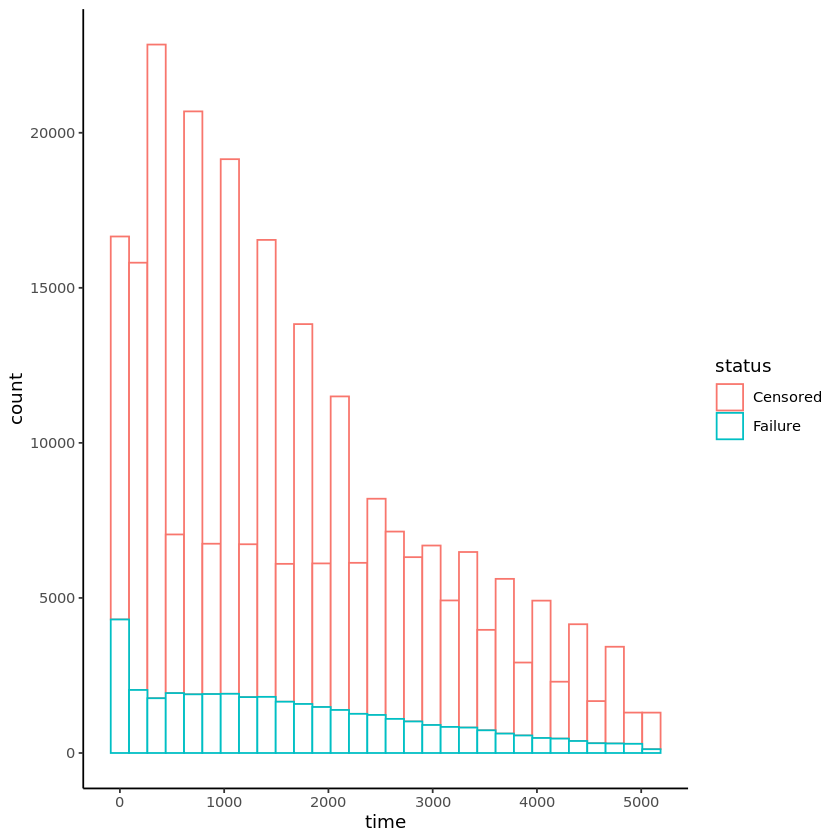

In [19]:
plotting <- test
plotting$time <- as.integer(plotting$time)
plotting$status <- as.character(plotting$status)
plotting$status[plotting$status==1]<- "Censored"
plotting$status[plotting$status==2]<- "Failure"
plotting$status <- as.factor(plotting$status)


ggplot(plotting, aes(x=time, color=status)) +
    geom_histogram(fill="white")+
    theme_classic()

In [20]:
covariates <- colnames(test)
covariates <- covariates[!covariates %in% c("time","status")]
covariates


[1] "CAN_ABO"             "CAN_DIAB_TY"         "CAN_GENDER"         
 [4] "CAN_MALIG"           "DON_ABO"             "DON_AGE"            
 [7] "DON_GENDER"          "REC_AGE_AT_TX"       "REC_A_MM_EQUIV_CUR" 
[10] "REC_A_MM_EQUIV_TX"   "REC_BMI"             "REC_B_MM_EQUIV_CUR" 
[13] "REC_B_MM_EQUIV_TX"   "REC_DR_MM_EQUIV_CUR" "REC_DR_MM_EQUIV_TX" 
[16] "REC_MM_EQUIV_CUR"    "REC_MM_EQUIV_TX"     "REC_COLD_ISCH_TM"   
[19] "REC_CREAT"           "REC_DISCHRG_CREAT"   "dialysistotx"       
[22] "txtodischarge"       "yeartx"

Do univariate cox for each variable to check if they are significant and if not drop them

In [21]:
#making formulas
univ_formulas <- sapply(covariates,function(x)as.formula(paste('Surv(time,status)~',x))
)
#making a list of models
univ_models <- lapply(univ_formulas, function(x){coxph(x,data=test)})

#extract data (here I've gone for HR and confint)
univ_results <- lapply(univ_models,function(x){cbind(exp(cbind(coef(x),confint(x))),Pval=anova(x)[2,4])})

In [22]:
univ_results

,,2.5 %,97.5 %,Pval
CAN_ABOA1,0.9932717,0.9027889,1.092823,2.548482e-09
CAN_ABOA1B,1.0420544,0.7668914,1.415947,2.548482e-09
CAN_ABOA2,1.0566780,0.8433340,1.323993,2.548482e-09
CAN_ABOA2B,1.7417975,1.1233314,2.700769,2.548482e-09
CAN_ABOAB,0.9516023,0.9031540,1.002650,2.548482e-09
CAN_ABOB,1.0377673,1.0040754,1.072590,2.548482e-09
CAN_ABOO,1.0727573,1.0483197,1.097765,2.548482e-09
,,2.5 %,97.5 %,Pval
CAN_DIAB_TY2,0.7081654,0.6658148,0.7532097,1.1153e-122
CAN_DIAB_TY3,0.7457988,0.7250630,0.7671277,1.1153e-122


In [23]:
# looking at the 95 % CI and p-value of the anova we can exclude
test <- test %>% select(-c("REC_BMI","yeartx"))
head(test)
colnames(test)

CAN_ABO,CAN_DIAB_TY,CAN_GENDER,CAN_MALIG,DON_ABO,DON_AGE,DON_GENDER,REC_AGE_AT_TX,REC_A_MM_EQUIV_CUR,REC_A_MM_EQUIV_TX,⋯,REC_DR_MM_EQUIV_TX,REC_MM_EQUIV_CUR,REC_MM_EQUIV_TX,REC_COLD_ISCH_TM,REC_CREAT,REC_DISCHRG_CREAT,time,status,dialysistotx,txtodischarge
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<drtn>,<dbl>,<int>,<int>
B,3,M,N,B,45,F,68,2,2,⋯,2,5,5,6.18,7.33,1.96,2198 days,2,-786,6
A,1,M,N,A,48,M,69,1,1,⋯,1,3,3,1.00,4.60,1.00,2923 days,1,-309,6
O,1,M,N,O,28,F,59,2,2,⋯,1,5,5,11.30,3.70,3.80,1781 days,2,-1312,7
O,3,M,N,O,54,F,59,2,2,⋯,2,6,6,12.78,8.25,3.17,3114 days,1,-2487,4
B,1,F,N,B,57,F,59,2,2,⋯,2,6,6,0.92,6.54,0.98,2913 days,1,-824,5
A,1,M,N,A1,47,M,35,2,2,⋯,1,5,5,14.95,10.30,5.90,2853 days,1,-3000,7


[1] "CAN_ABO"             "CAN_DIAB_TY"         "CAN_GENDER"         
 [4] "CAN_MALIG"           "DON_ABO"             "DON_AGE"            
 [7] "DON_GENDER"          "REC_AGE_AT_TX"       "REC_A_MM_EQUIV_CUR" 
[10] "REC_A_MM_EQUIV_TX"   "REC_B_MM_EQUIV_CUR"  "REC_B_MM_EQUIV_TX"  
[13] "REC_DR_MM_EQUIV_CUR" "REC_DR_MM_EQUIV_TX"  "REC_MM_EQUIV_CUR"   
[16] "REC_MM_EQUIV_TX"     "REC_COLD_ISCH_TM"    "REC_CREAT"          
[19] "REC_DISCHRG_CREAT"   "time"                "status"             
[22] "dialysistotx"        "txtodischarge"

Create multivariate cox regression

In [28]:
res.cox <- coxph(Surv(time, status) ~ CAN_GENDER+CAN_ABO+CAN_DIAB_TY+CAN_MALIG+DON_ABO+DON_AGE+DON_GENDER+REC_AGE_AT_TX+REC_A_MM_EQUIV_CUR+REC_A_MM_EQUIV_TX+REC_B_MM_EQUIV_CUR+REC_B_MM_EQUIV_TX+REC_DR_MM_EQUIV_CUR+REC_DR_MM_EQUIV_TX+REC_MM_EQUIV_CUR+REC_MM_EQUIV_TX+REC_COLD_ISCH_TM+REC_CREAT+REC_DISCHRG_CREAT+dialysistotx+txtodischarge, data = test)

In [29]:
options(scipen=999)
summary(res.cox)

Call:
coxph(formula = Surv(time, status) ~ CAN_GENDER + CAN_ABO + CAN_DIAB_TY + 
    CAN_MALIG + DON_ABO + DON_AGE + DON_GENDER + REC_AGE_AT_TX + 
    REC_A_MM_EQUIV_CUR + REC_A_MM_EQUIV_TX + REC_B_MM_EQUIV_CUR + 
    REC_B_MM_EQUIV_TX + REC_DR_MM_EQUIV_CUR + REC_DR_MM_EQUIV_TX + 
    REC_MM_EQUIV_CUR + REC_MM_EQUIV_TX + REC_COLD_ISCH_TM + REC_CREAT + 
    REC_DISCHRG_CREAT + dialysistotx + txtodischarge, data = test)

  n= 247205, number of events= 36924 

                             coef    exp(coef)     se(coef)       z
CAN_GENDERM          -0.145874020  0.864266577  0.011007833 -13.252
CAN_ABOA1             0.072584252  1.075283397  0.048967676   1.482
CAN_ABOA1B            0.095818797  1.100559621  0.158827005   0.603
CAN_ABOA2             0.090794172  1.095043591  0.115192042   0.788
CAN_ABOA2B            0.672209477  1.958559937  0.224579885   2.993
CAN_ABOAB            -0.071373654  0.931113913  0.038747874  -1.842
CAN_ABOB             -0.004573306  0.995437135  0.037945999  -

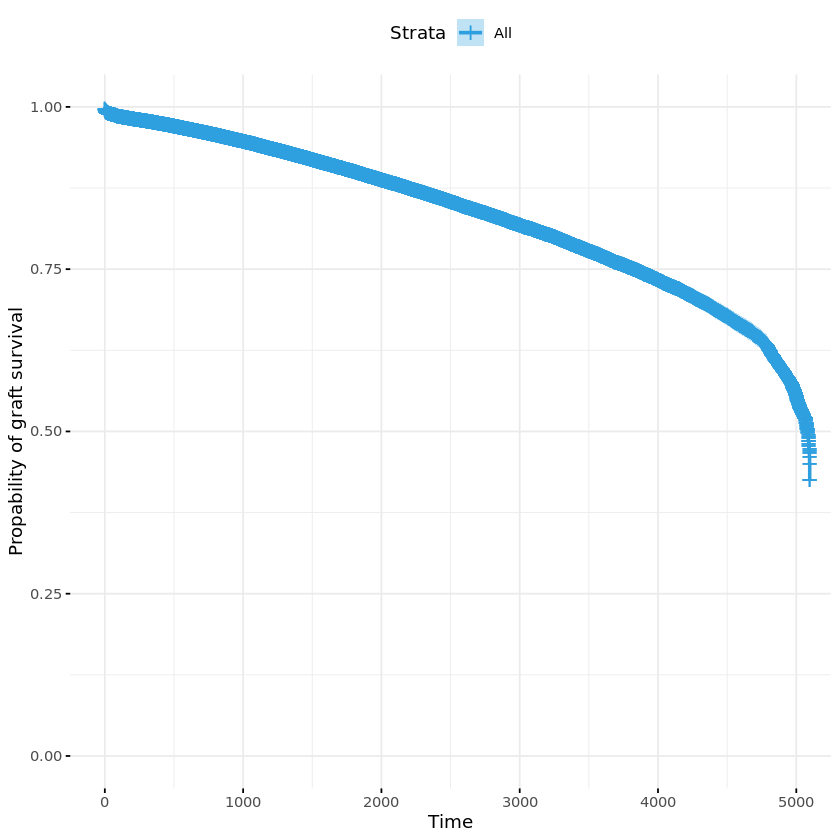

In [30]:
ggsurvplot(survfit(res.cox),data=test, palette = "#2E9FDF",
           ggtheme = theme_minimal(), ylab = c("Propability of graft survival"))

In [31]:
extractAIC(res.cox)

[1]     52.0 835166.4